In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

Passenger_ID = test['PassengerId']

In [5]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [7]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [8]:
train.sort_values(by='SibSp', ascending=False).head(9)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.90,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.90,NaN,S


In [9]:
outliner_SibSp = train.loc[train['SibSp']==8]

In [10]:
outliner_SibSp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [11]:
train = train.drop(outliner_SibSp.index, axis=0)

In [12]:
train.sort_values(by =['Fare', 'Pclass'], ascending=False) # Here three people have Much Higher Fare 500+.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S


In [13]:
outliner_Fare = train.loc[train['Fare']>500]

In [14]:
outliner_Fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [15]:
train = train.drop(outliner_Fare.index, axis=0)

In [16]:
train.shape

(881, 12)

In [17]:
dataset = pd.concat([train, test], ignore_index=True)

In [18]:
dataset.shape

(1299, 12)

In [19]:
dataset = dataset.fillna(np.nan)
dataset.isnull().sum()

Age             256
Cabin          1006
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [20]:
dataset.loc[dataset['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
821,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


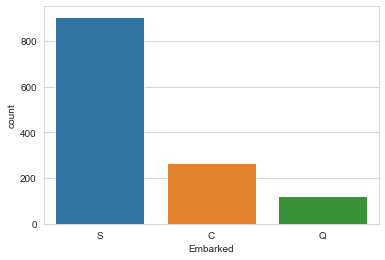

In [21]:
sns.countplot(dataset['Embarked'])

In [22]:
dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [23]:
dataset.loc[dataset['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1033,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [24]:
temp = dataset[(dataset['Pclass'] == 3) & (dataset['Parch'] ==0) & (dataset['SibSp'] == 0) 
               & (dataset['Fare']>0)].sort_values(by='Fare', ascending=False)

In [25]:
temp.mean()

Age             27.444444
Fare             9.174623
Parch            0.000000
PassengerId    660.451820
Pclass           3.000000
SibSp            0.000000
Survived         0.212500
dtype: float64

In [26]:
temp['Fare'].mean()

9.174623340471092

In [27]:
dataset['Fare'] = dataset['Fare'].fillna(temp['Fare'].mean())

In [28]:
dataset.isnull().sum()

Age             256
Cabin          1006
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [29]:
dataset[(dataset['Sex'] =='male') & (dataset['Survived'] == 0)]['Age'].mean()

31.618055555555557

In [30]:
dataset[dataset['Sex'] == 'female']['Age'].mean()

28.67077519379845

In [31]:
nullAge = dataset.loc[dataset['Age'].isnull()]

In [32]:
nullAge.shape

(256, 12)

In [33]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [34]:
dataset['Age'] = dataset[['Age', 'Pclass']].apply(impute_age, axis=1)

In [35]:
dataset.isnull().sum()

Age               0
Cabin          1006
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

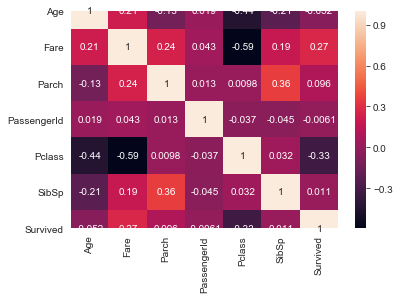

In [36]:
sns.heatmap(dataset.corr(), annot=True)

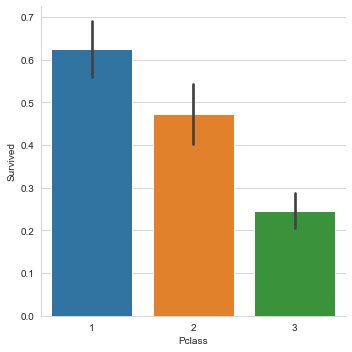

In [37]:
sns.catplot(data = dataset, x='Pclass', y='Survived', kind='bar', orient='v')

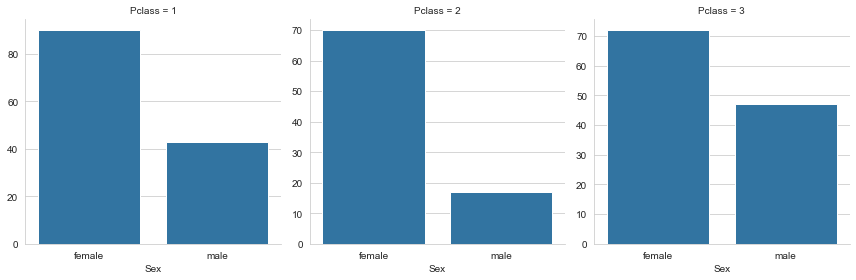

In [38]:
g = sns.FacetGrid(data = dataset.loc[dataset['Survived']==1], col='Pclass', sharey=False, height=4)
g = g.map(sns.countplot, 'Sex')

In [39]:
X=dataset.drop(['Cabin','Name','PassengerId','Survived','Ticket'],axis=1)
Y=dataset['Survived']

In [40]:
X.head(3)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,22.0,S,7.2500,0,3,male,1
1,38.0,C,71.2833,0,1,female,1
2,26.0,S,7.9250,0,3,female,0


In [41]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

In [42]:
X['Embarked']=LabelEncoder().fit_transform(X['Embarked'])
X['Sex']=LabelEncoder().fit_transform(X['Sex'])
X['Age']=StandardScaler().fit_transform(np.array(X['Age']).reshape(-1,1))
X['Fare']=StandardScaler().fit_transform(np.array(X['Fare']).reshape(-1,1))

In [43]:
X.head(3)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,-0.543808,2,-0.532357,0,3,1,1
1,0.671167,0,0.846340,0,1,0,1
2,-0.240065,2,-0.517824,0,3,0,0


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
trainDataX=X[:train.shape[0]]
trainDataY=Y[:train.shape[0]].astype('int32')
testDataX=X[train.shape[0]:]

In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(trainDataX,trainDataY,test_size=0.1,random_state=101)

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
randomForest = RandomForestClassifier().fit(X_train, Y_train)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
print(accuracy_score(Y_train, randomForest.predict(X_train)))

0.9659090909090909


In [51]:
print(accuracy_score(Y_test, randomForest.predict(X_test)))

0.797752808988764


In [52]:
submission = pd.DataFrame(columns=['PassengerId', 'Survived'])

In [53]:
submission['PassengerId'] = Passenger_ID

In [54]:
submission['Survived'] = randomForest.predict(testDataX)

In [55]:
submission.shape

(418, 2)

In [56]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [57]:
filename = 'Submission.csv'

In [58]:
submission.to_csv(filename, index=False)

In [59]:
from IPython.display import FileLink
FileLink(filename)

D:\Jupyter Notebook Files\PROJECT'S\Kaggle Projects\Titanic\Submission.csv